# 분류의 개요
기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 방식  

<br>

분류의 알고리즘
- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른 (또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

# 결정트리
- 규칙(if - else - )을 기반으로 모델을 학습함

![image](https://user-images.githubusercontent.com/70187490/128458197-b0c6cd9c-7353-4208-a000-8ceed4a6d3fc.png)

- 규칙 노드(Decision Node): 규칙 조건이 되는 노드
- 리프 노드(Leaf Node): 결정된 클래스 값
- 서브 트리(Sub Tree): 새로운 규칙 조건마다 생성되는 가지(브랜치)  


규칙 조건이 만들 때마다 규칙 노드가 만들어짐  
많은 규칙이 있을 수록 모델이 복잡해지며 이는 과적합으로 이어짐  
  -> 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하됌

가능한 적은 결정 노드로 높은 예측 정확도를 가지려면?  
-> 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있는 결정 노드의 규칙이 필요  

<br>

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦  
- 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고  
- 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식으로 자식 트리를 내려가면서
- 이를 반복하는 형식으로 데이터 값을 예측함  

<br>

이러한 정보의 균일도를 측정하는 대표적인 방법으로는 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니 계수가 있음
- 정보이득은 엔트로피라는 개념을 기반으로 함
- 엔트로피는 주어진 데이터 집합의 혼잡도를 의미
- 서로 다른 값이 섞여 있으면 엔트로피가 높고
- 같은 값이 섞여 있으면 엔트로피가 낮음
- 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값
- 정보 이득이 높은 속성을 기준으로 분할

<br>

- 지니 계수는 0이 가장 평등하고 1로 갈수록 불평등함
- 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할

<br>

>즉 정보 이득이 높거나 지니계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할 한 뒤,   
>데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정   

- 사이킷런의 DecisionTreeClassifier의 Default 값은 지니 계수  
![image](https://user-images.githubusercontent.com/70187490/128492000-073cdf9a-cca3-4023-a5cc-554f9c9ebba5.png)

## 결정 트리 모델의 결정

|결정 트리 장점|결정 트리의 단점|
|:-|:-|
|쉽고 직관적이다.|과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요|
|피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음|

- 모든 것을 만족하는 규칙은 만들 수 없다고 인정하고 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움

## 결정 트리 파라미터
![image](https://user-images.githubusercontent.com/70187490/128495313-e3a9e5a8-1dca-4522-b41b-92873cac9ae3.png)

### 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris_data= load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf. predict(X_test)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity=True, filled=True)

0.9333333333333333


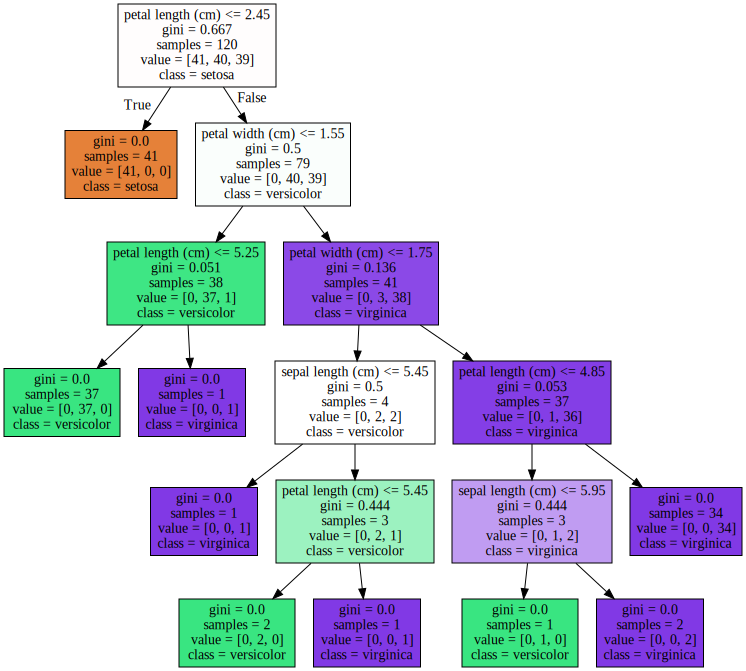

In [3]:
import graphviz

print(accuracy_score(pred, y_test))

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### DecisionTree 하이퍼 파라미터 조절 - max_depth

0.9333333333333333


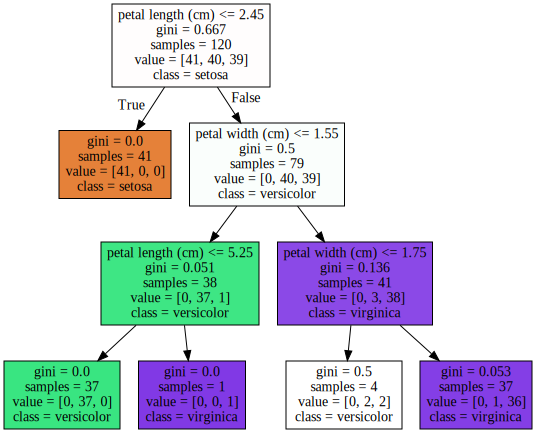

In [4]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, 
                feature_names = iris.feature_names, impurity=True, filled=True)

print(accuracy_score(pred, y_test))

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### DecisionTree 하이퍼파라미터 조절 - min_samples_split

0.9333333333333333


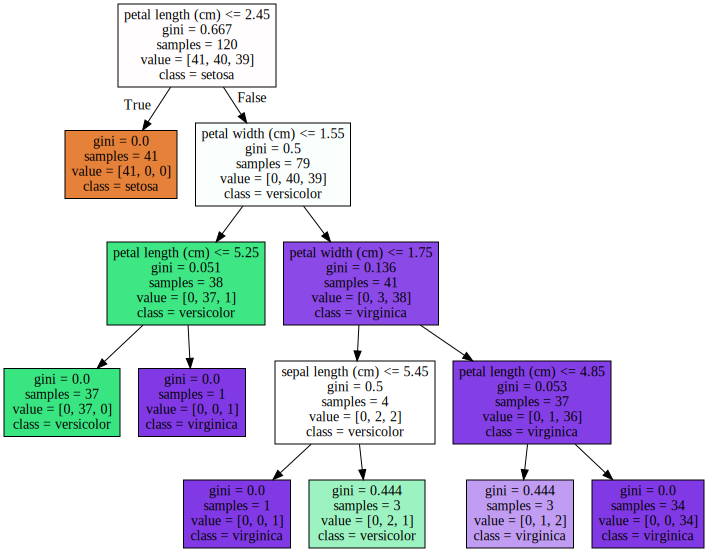

In [5]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
                feature_names = iris.feature_names, impurity=True, filled=True)

print(accuracy_score(pred, y_test))

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### DecisionTree 하이퍼파라미터 조절 - min_samples_leaf

0.9333333333333333


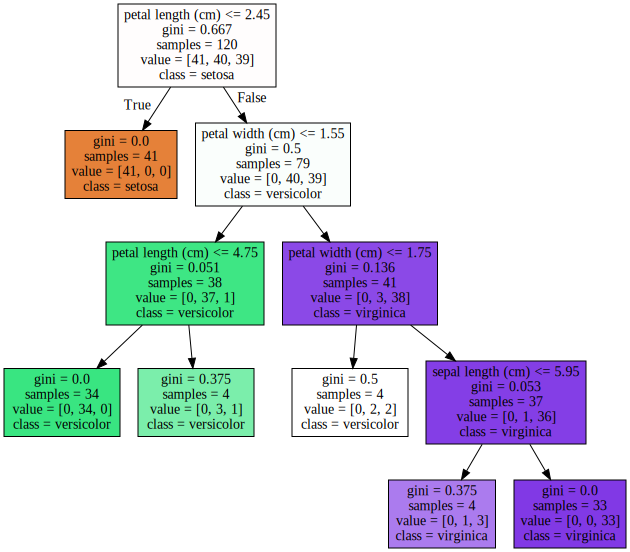

In [6]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names,
                feature_names= iris.feature_names, impurity=True, filled=True)

print(accuracy_score(pred, y_test))

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### Feature importance 시각화

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


Featrue importances: 
[0.006 0.    0.546 0.448]
sepal length (cm):0.006
sepal width (cm):0.000
petal length (cm):0.546
petal width (cm):0.448


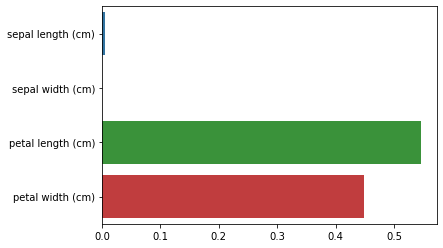

In [7]:
import seaborn as sns
import numpy as np

# feature importance 추출
print("Featrue importances: \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names);

### 결정 트리 과적합(Overfitting)
결정트리가 어떻게 학습 데이터를 분할하고 예측할 때 과적합이 일어나는지를 시각화

- make_classification( ) 함수:
    - 분류를 위한 테스트용 데이터를 쉽게 만들어줌
    - 반환하는 객체는 피처 데이터 세트와 클래스 레이블 데이터
    - 이 함수를 이용하여 2개의 피처가 3가지 유형의클래스 값을 가지는 데이터 세트를 만드는 예시  
    
위를 이용해 과적합 과정을 시각화

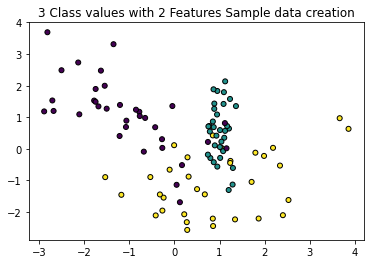

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2 차원 시각화를 위해서 피처는 2개 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolors='k');

In [118]:
def visualize_boundary(estimator, X, y):
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score
    import numpy as np
    
    estimator.fit(X, y)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolor='k', s=20, zorder=3);
    ax.axis('tight')
    ax.axis('off')
    
    estimator.fit(X, y)
    
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()        
    
    xx, yy = np.meshgrid( np.arange(xlim_start, xlim_end, 0.02),
                          np.arange(ylim_start, ylim_end, 0.02))
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.5,
                           levels=np.arange(len(np.unique(y)) + 1) - 0.5,
                           cmap='rainbow');

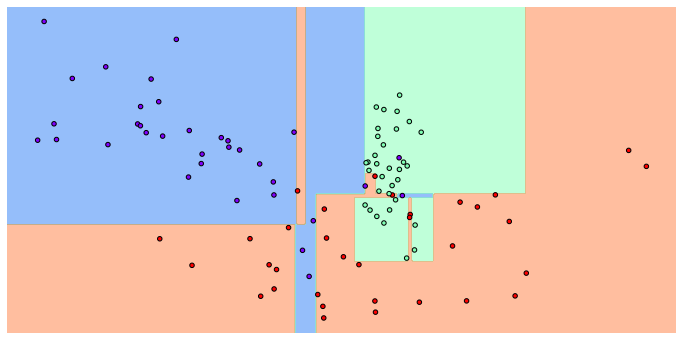

In [119]:
# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화 

dt_clf = DecisionTreeClassifier()
visualize_boundary(dt_clf, X_features, y_labels)

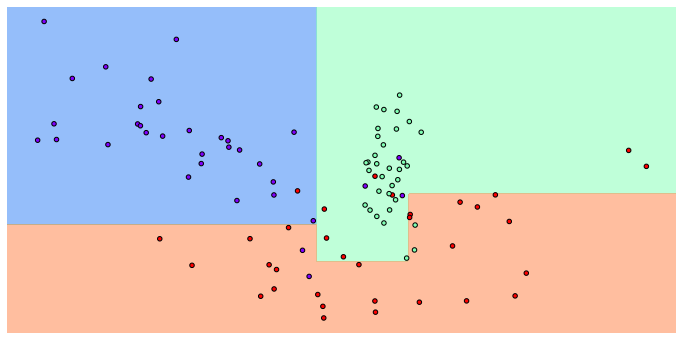

In [120]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트
- 데이터는 1만 여개, 속성수는 561개
- 분류하려는 행동 갯수는 걷기, 계단 올라가기, 계단 내려가기, 앉기, 서있기, 눕기로 총 6가지
- 데이터 들은 갤럭시 S2의 가속도/자이로계에서 정보들을 50Hz로 받았음
- 전체 데이터 중 70%로가 훈련용, 30%로가 테스트용

In [130]:
import pandas as pd

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('D:\Python/human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고 , 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z 축값으로 되어 있음
- 이러한 피처명을 pandas로 불러오면 오류가 발생됨
- 중복된 피처명에 대해서 원본 피처명에 _1또는 _2를 부여해 변경한 뒤에 이를 DataFrame으로 로드

In [149]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 총 42개의 피처명이 중복되어 있으므로 이들에 대해서 원본 피처명에 _1, _2를 추가하는 함수 생성

In [137]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_'+str(x[1])
                                                                                              if x[1] > 0 else x[0], axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
    
    return new_feature_name_df

In [146]:
feature_dup_df = feature_name_df.groupby('column_name').cumcount()
pei = pd.DataFrame(feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
pei

,dup_cnt
0,0
1,0
2,0
3,0
4,0
...,...
556,0
557,0
558,0
559,0


In [147]:
pei.reset_index()

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
556,556,0
557,557,0
558,558,0
559,559,0


In [165]:
t = pd.merge(feature_name_df.reset_index(), pei.reset_index(), how='outer')
t.head(30)

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
5,5,6,tBodyAcc-std()-Z,0
6,6,7,tBodyAcc-mad()-X,0
7,7,8,tBodyAcc-mad()-Y,0
8,8,9,tBodyAcc-mad()-Z,0
9,9,10,tBodyAcc-max()-X,0


In [168]:
t['column_name'] = t[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) 
                                    if x[1] > 0 else x[0], axis=1)
t.head(60)

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
5,5,6,tBodyAcc-std()-Z,0
6,6,7,tBodyAcc-mad()-X,0
7,7,8,tBodyAcc-mad()-Y,0
8,8,9,tBodyAcc-mad()-Z,0
9,9,10,tBodyAcc-max()-X,0
